In [1]:
from scipy.io import loadmat
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Perceptron Learning Models

Given a feature vector $x$ and a weight vector $w$, we define the perceptron $w^T x = 0$, where $x_0 = 1$ and $w_0 = \theta$ is called the threshold. The goal is to iteratively train the model, by altering the elements of $w$, in order to separate the feature vectors into categories.

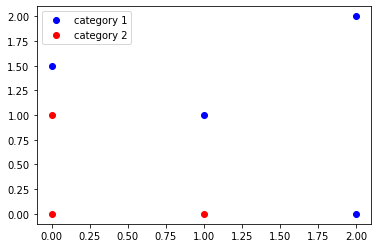

In [109]:
# Here we input a small dataset of feature vectors and corresponding categories
features = np.array([[0., 1.5], [1.,1.], [2.,2.], [2., 0.], [0.,0.], [1.,0.], [0.,1.]])
labels = np.array([1.,1.,1.,1.,-1.,-1.,-1.])

fig, ax = plt.subplots(1)
ax.plot(features[0:4,0], features[0:4,1], 'bo')
ax.plot(features[4:,0], features[4:,1], 'ro')
ax.legend(['category 1','category 2'])
# We can see that the data is separable

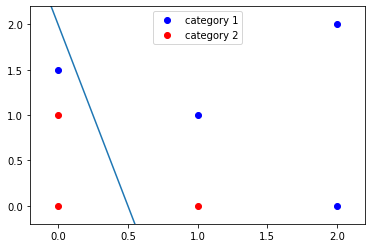

In [110]:
# We define a starting weight vector, the first entry is the threshold
w_guess = np.array([-2., 4., 1.])
# the linear model w^Tx = 0, where x0 = 1 can be plotted over the data: -2x0 + 4x1 + x2 = 0
x1 = np.linspace(-2,2,2)
x2 = (-w_guess[0] - w_guess[1]*x1)/w_guess[2] # just solving for x2
ax.plot(x1, x2, '-')
ax.set_ylim([-0.2, 2.2]); ax.set_xlim([-0.2, 2.2])
fig

In [111]:
# Next, we need to apply the perceptron learning algorithm (PLA). Need to check if our separation plane is right
out = np.dot(np.concatenate((np.ones((labels.shape[0],1)), features), axis=1),   w_guess)
print('current perceptron output',out) # the output of the current perceptron model
print('correct perceptron labels', labels)
# Now do these classifications agree? So is our perceptron model any good?
if np.sum(np.sign(out) == labels) < labels.shape[0]:
    print('False: perceptron has errors')
else: 
    print('True: perceptron has no errors')

current perceptron output [-0.5  3.   8.   6.  -2.   2.  -1. ]
correct perceptron labels [ 1.  1.  1.  1. -1. -1. -1.]
False: perceptron has errors


In [148]:
def PerceptronLearningAlgorithm(w_guess, features, labels, epoch):
    '''This code implements the PLA method, given a feature vector, correct labels, an initial 
    guess for the weights, and number of iterations, called epoch. Returns the final weights.
    Make sure the feature vector is augmented with an extra column of ones for the threshold.'''
        
    w_old = w_guess
    full_weights = w_guess
    out = np.dot(features,  w_old)
    for i in range(epoch):
        print('Epoch: ', i)
        for j in range(labels.shape[0]):
            if (np.sign(out[j]) != labels[j]):
                #print('wrong label')
                w_new = w_old + labels[j]*features[j,:]
                out = np.dot(features, w_new)
                w_old = np.copy(w_new)
                full_weights = np.vstack((full_weights, w_new)) # adds the new weights onto old ones
                #print(w_new) # iteratively prints the new weights
            else:
                #print('good here')
                pass
                
    print('final test:')
    print('Model Output: ', out)
    print('True Labels: ', labels)
    return full_weights

In [120]:
# Add an extra column of ones to the features
features_aug = np.concatenate((np.ones((labels.shape[0],1)), features), axis=1)
weights_final = PerceptronLearningAlgorithm(w_guess, features_aug, labels, 5)

output_final = np.dot(features_aug, weights_final[-1,:])
if np.sum(np.sign(output_final) == labels) < labels.shape[0]:
    print('Incorrect Weights: perceptron has errors with weights',weights_final[-1,:])
else: 
    print('Correct Weights: perceptron has no errors with weights',weights_final[-1,:])

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
final test:
Model Output:  [ 0.5  2.   8.   2.  -4.  -1.  -1. ]
True Labels:  [ 1.  1.  1.  1. -1. -1. -1.]
Correct Weights: perceptron has no errors with weights [-4.  3.  3.]


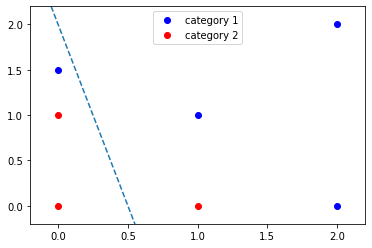

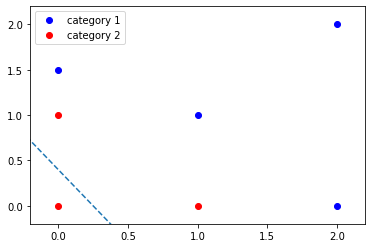

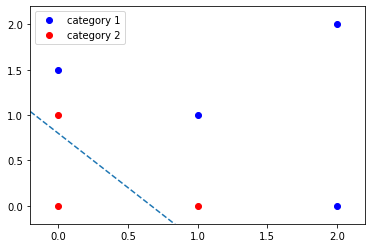

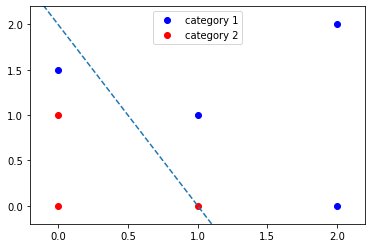

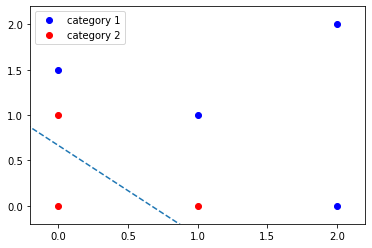

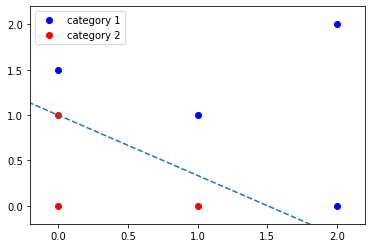

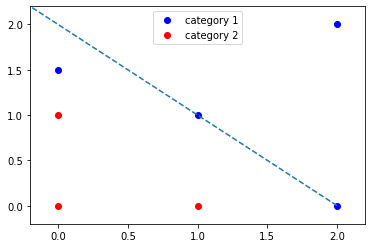

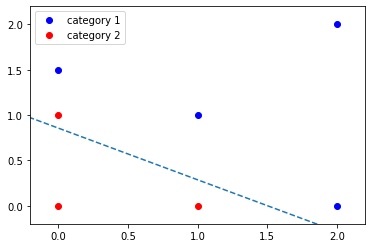

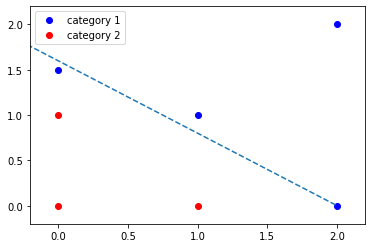

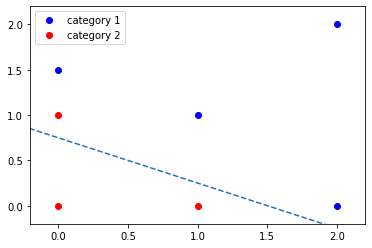

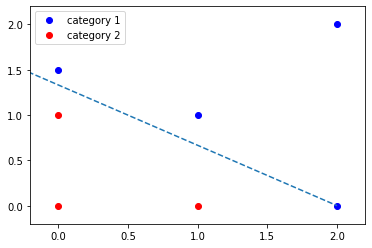

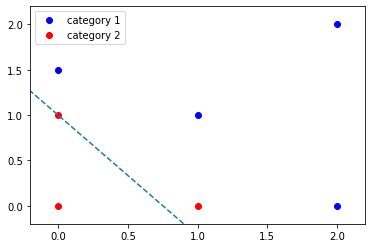

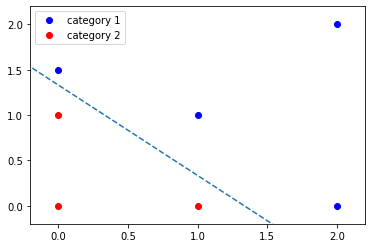

In [7]:
# Now we want to iteratively plot how the separating plane changes
x1 = np.linspace(-2,2,2)

for i in range(weights_final.shape[0]):
    plt.plot(features[0:4,0], features[0:4,1], 'bo')
    plt.plot(features[4:,0], features[4:,1], 'ro')
    plt.legend(['category 1','category 2'])
    w = weights_final[i,:]
    x2 = (-w[0] - w[1]*x1)/w[2] # just solving for x2
    plt.plot(x1, x2, '--')
    plt.ylim([-0.2, 2.2]); plt.xlim([-0.2, 2.2])
    plt.pause(0.5)
    plt.close()


# k-Nearest Neighbors

We start with a data file containing feature vectors and categories that we would like to cluster together using the kNN algorithm. 

In [8]:
# Import and organize the data
SampleCredit = loadmat('SampleCredit.mat')

labels = SampleCredit['label']
features = SampleCredit['sample']

In [9]:
training_feat = features[:500,:]
testing_feat = features[500:,:]
training_lab = labels[:500]
testing_lab = labels[500:]

In [10]:
def kNN(k, train_feat, test_feat, train_label, test_label):
    '''Implements the k-Nearest Neighbors algorithm given k, training and testing data.
    It is best if k is an odd number so we can have a majority vote'''
    num_test = len(test_label)
    computed_test_label = np.zeros((num_test,))
    
    for i in range(num_test):
        distance_from_ith_point = np.linalg.norm(test_feat[i,:] - train_feat, 2, axis = 1) # L2 distance
        kNN_indices = np.argsort(distance_from_ith_point)[:k]
        kNN_labels = train_label[kNN_indices]
        computed_test_label[i] = stats.mode(kNN_labels).mode
        
    return computed_test_label

In [11]:
# Let's define an arbitrary k and compute the kNN solution
computed_test_labels = kNN(123, training_feat, testing_feat, training_lab, testing_lab)

# Now to define an error, just make it the percentage of incorrect label assignments
error_percent = np.sum(computed_test_labels != np.squeeze(testing_lab))/len(computed_test_labels)

In [14]:
# Now we will test all of the possible k values to find the optimal one
k_values = 500
error_percent_byk = np.zeros((k_values,))

for k in np.arange(1,k_values+1):
    if np.mod(k,50) == 0:
        print(k, ' of ', k_values)
        
    computed_test_labels = kNN(k, training_feat, testing_feat, training_lab, testing_lab)
    error_percent_byk[k-1] = np.sum(computed_test_labels != np.squeeze(testing_lab))/len(computed_test_labels)

50  of  500
100  of  500
150  of  500
200  of  500
250  of  500
300  of  500
350  of  500
400  of  500
450  of  500
500  of  500


Minimum error achieved for k =  162


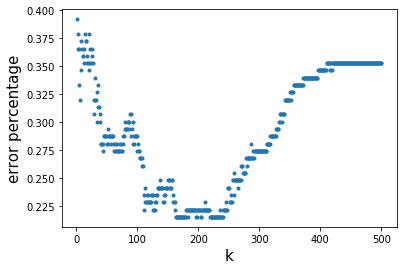

In [15]:
plt.plot(np.arange(1,k_values+1), error_percent_byk, '.')
plt.xlabel('k', fontsize=15)
plt.ylabel('error percentage', fontsize=15)

minimum_error_k = np.argmin(error_percent_byk)
print('Minimum error achieved for k = ', minimum_error_k) # this is not a unique minimizer

In [27]:
# The optimal k is thus 162. Some other values of k get the same validation error
RootN = int(np.round(np.sqrt(len(training_lab)))) # this is sqrt(N)
print('Square root of training set is k =', RootN, ' with error percent ', error_percent_byk[RootN])
print('Minimum error for k =', minimum_error_k, ' with error percent ', error_percent_byk[minimum_error_k])

# Thus the square root is not the optimal choice for k in the kNN algorithm

Square root of training set is k = 22  with error percent  0.35294117647058826
Minimum error for k = 162  with error percent  0.21568627450980393


In [57]:
# Now we try normalizing each feature by its maximum value across the samples and applying kNN
max_feat = np.max(features, axis=0)
training_feat_norm = training_feat/max_feat
testing_feat_norm = testing_feat/max_feat

In [61]:
# Now we will test all of the possible k values to find the optimal one
error_percent_byk_normdata = np.zeros((k_values,))

for k in np.arange(1,k_values+1):
    if np.mod(k,50) == 0:
        print(k, ' of ', k_values)
        
    computed_test_labels_normdata = kNN(k, training_feat_norm, testing_feat_norm, training_lab, testing_lab)
    error_percent_byk_normdata[k-1] = np.sum(computed_test_labels_normdata != np.squeeze(testing_lab))/len(computed_test_labels)

50  of  500
100  of  500
150  of  500
200  of  500
250  of  500
300  of  500
350  of  500
400  of  500
450  of  500
500  of  500


Minimum error achieved for k =  [  5 123 125 126 127 129 130]


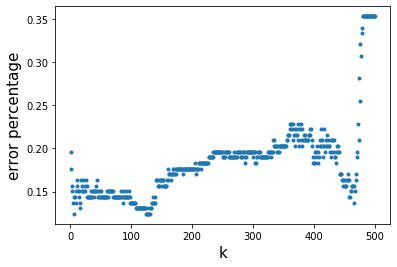

In [78]:
plt.plot(np.arange(1,k_values+1), error_percent_byk_normdata, '.')
plt.xlabel('k', fontsize=15)
plt.ylabel('error percentage', fontsize=15)

minimum_error_k_normdata = np.squeeze(np.where(error_percent_byk_normdata == error_percent_byk_normdata.min()))
print('Minimum error achieved for k = ', minimum_error_k_normdata) # this is not a unique minimizer

In [80]:
# The optimal k is thus 5 or the others listed. Now we check the square root of the training size
print('Square root of training set is k =', RootN, ' with error percent ', error_percent_byk_normdata[RootN])
print('Minimum error for k =', minimum_error_k_normdata, ' with error percent ', error_percent_byk_normdata[minimum_error_k_normdata[0]])

# Thus the square root is not the optimal choice for k in the kNN algorithm, but it is closer with normalized data

Square root of training set is k = 22  with error percent  0.1503267973856209
Minimum error for k = [  5 123 125 126 127 129 130]  with error percent  0.12418300653594772


## Now we apply the Perceptron Learning Algorithm to this problem with 1000 epochs. We have the function defined for PLA for the previous problem. 

### We begin with using the un-normalized feature vectors

In [153]:
# Add an extra column of ones to the features
w_guess = np.ones((training_feat.shape[1]+1,)) # the initial guess will have all ones
training_feat_aug = np.concatenate((np.ones((training_lab.shape[0],1)), training_feat), axis=1)

# Now we run the PLA. Warning: this computation takes a few minutes with 1000 epochs!
weights_final = PerceptronLearningAlgorithm(w_guess, training_feat_aug, np.squeeze(training_lab), 1000)


Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Epoch:  38
Epoch:  39
Epoch:  40
Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
Epoch:  45
Epoch:  46
Epoch:  47
Epoch:  48
Epoch:  49
Epoch:  50
Epoch:  51
Epoch:  52
Epoch:  53
Epoch:  54
Epoch:  55
Epoch:  56
Epoch:  57
Epoch:  58
Epoch:  59
Epoch:  60
Epoch:  61
Epoch:  62
Epoch:  63
Epoch:  64
Epoch:  65
Epoch:  66
Epoch:  67
Epoch:  68
Epoch:  69
Epoch:  70
Epoch:  71
Epoch:  72
Epoch:  73
Epoch:  74
Epoch:  75
Epoch:  76
Epoch:  77
Epoch:  78
Epoch:  79
Epoch:  80
Epoch:  81
Epoch:  82
Epoch:  83
Epoch:  84
Epoch:  85
Epoch:  86
Epoch:  87
Epoch:  88
Epoch:  89
Epoch:  90
Epoch:  9

Epoch:  692
Epoch:  693
Epoch:  694
Epoch:  695
Epoch:  696
Epoch:  697
Epoch:  698
Epoch:  699
Epoch:  700
Epoch:  701
Epoch:  702
Epoch:  703
Epoch:  704
Epoch:  705
Epoch:  706
Epoch:  707
Epoch:  708
Epoch:  709
Epoch:  710
Epoch:  711
Epoch:  712
Epoch:  713
Epoch:  714
Epoch:  715
Epoch:  716
Epoch:  717
Epoch:  718
Epoch:  719
Epoch:  720
Epoch:  721
Epoch:  722
Epoch:  723
Epoch:  724
Epoch:  725
Epoch:  726
Epoch:  727
Epoch:  728
Epoch:  729
Epoch:  730
Epoch:  731
Epoch:  732
Epoch:  733
Epoch:  734
Epoch:  735
Epoch:  736
Epoch:  737
Epoch:  738
Epoch:  739
Epoch:  740
Epoch:  741
Epoch:  742
Epoch:  743
Epoch:  744
Epoch:  745
Epoch:  746
Epoch:  747
Epoch:  748
Epoch:  749
Epoch:  750
Epoch:  751
Epoch:  752
Epoch:  753
Epoch:  754
Epoch:  755
Epoch:  756
Epoch:  757
Epoch:  758
Epoch:  759
Epoch:  760
Epoch:  761
Epoch:  762
Epoch:  763
Epoch:  764
Epoch:  765
Epoch:  766
Epoch:  767
Epoch:  768
Epoch:  769
Epoch:  770
Epoch:  771
Epoch:  772
Epoch:  773
Epoch:  774
Epoc

In [162]:
output_final = np.dot(training_feat_aug, weights_final[-1,:])
if np.sum(np.sign(output_final) == np.squeeze(training_lab)) < training_lab.shape[0]:
    print('Incorrect Weights: perceptron has some errors with weights',weights_final[-1,:])
    print(np.sum(np.sign(output_final) == np.squeeze(training_lab)), ' correct labels of ', training_lab.shape[0])
else: 
    print('Correct Weights: perceptron has no errors with weights',weights_final[-1,:])
    

Incorrect Weights: perceptron has some errors with weights [ -2914.         -13052.          -6062.52         4417.16
 -17071.         -17071.          -4418.         -60713.
  64248.58499999 -62446.         -17386.          43450.
 -10700.          10958.          -6937.          56282.        ]
323  correct labels of  500


In [159]:
# Now we test the performance of this learned Perceptron on the testing data
testing_feat_aug = np.concatenate((np.ones((testing_lab.shape[0],1)), testing_feat), axis=1)
output_testing = np.dot(testing_feat_aug, weights_final[-1,:])
print(np.sum(np.sign(output_testing) == np.squeeze(testing_lab)), ' correct labels of ', testing_lab.shape[0])

104  correct labels of  153


### Now we repeat the PLA step with the normalized feature vectors

In [173]:
# Now we run the same experiment for the normalized feature vectors. Make take a few minutes!
w_guess = np.ones((training_feat.shape[1]+1,)) # the initial guess will have all ones
training_feat_norm_aug = np.concatenate((np.ones((training_lab.shape[0],1)), training_feat_norm), axis=1)
weights_final_norm = PerceptronLearningAlgorithm(w_guess, training_feat_norm_aug, np.squeeze(training_lab), 100)

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Epoch:  38
Epoch:  39
Epoch:  40
Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
Epoch:  45
Epoch:  46
Epoch:  47
Epoch:  48
Epoch:  49
Epoch:  50
Epoch:  51
Epoch:  52
Epoch:  53
Epoch:  54
Epoch:  55
Epoch:  56
Epoch:  57
Epoch:  58
Epoch:  59
Epoch:  60
Epoch:  61
Epoch:  62
Epoch:  63
Epoch:  64
Epoch:  65
Epoch:  66
Epoch:  67
Epoch:  68
Epoch:  69
Epoch:  70
Epoch:  71
Epoch:  72
Epoch:  73
Epoch:  74
Epoch:  75
Epoch:  76
Epoch:  77
Epoch:  78
Epoch:  79
Epoch:  80
Epoch:  81
Epoch:  82
Epoch:  83
Epoch:  84
Epoch:  85
Epoch:  86
Epoch:  87
Epoch:  88
Epoch:  89
Epoch:  90
Epoch:  9

In [174]:
output_final_norm = np.dot(training_feat_norm_aug, weights_final_norm[-1,:])
if np.sum(np.sign(output_final_norm) == np.squeeze(training_lab)) < training_lab.shape[0]:
    print('Incorrect Weights: perceptron has some errors with weights',weights_final_norm[-1,:])
    print(np.sum(np.sign(output_final_norm) == np.squeeze(training_lab)), ' correct labels of ', training_lab.shape[0])
else: 
    print('Correct Weights: perceptron has no errors with weights',weights_final_norm[-1,:])

Incorrect Weights: perceptron has some errors with weights [  9.          -0.5         -0.17537459  -5.44982143   2.33333333
   2.33333333  -0.5          2.33333333   3.35894737 -10.
  -5.           8.80597015  -1.5         -1.          -4.0045
  20.7155    ]
391  correct labels of  500


In [175]:
# Now we test the performance of this learned Perceptron on the testing data
testing_feat_norm_aug = np.concatenate((np.ones((testing_lab.shape[0],1)), testing_feat_norm), axis=1)
output_testing = np.dot(testing_feat_norm_aug, weights_final_norm[-1,:])
print(np.sum(np.sign(output_testing) == np.squeeze(testing_lab)), ' correct labels of ', testing_lab.shape[0])

129  correct labels of  153


## It appears that the PLA has significantly fewer errors when working with the normalized feature vectors, even when using 100 epochs vs 1000 for the un-normalized data.